In [ ]:
# 라이브러리 다운받기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import tensorflow as tf
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten , Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers


In [ ]:
# MNIST 데이터 읽어오고, train/valid/test으로 나누기
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

X_train=x_train[0:50000] / 255 #divide by 255 so that they are in range 0 to 1
Y_train=to_categorical(y_train[0:50000],10) # one-hot encoding

X_val=x_train[50000:60000] / 255
Y_val=to_categorical(y_train[50000:60000],10)

X_test=x_test / 255
Y_test=to_categorical(y_test,10)

del x_train, y_train, x_test, y_test

X_train=np.reshape(X_train, (X_train.shape[0],28,28,1))
X_val=np.reshape(X_val, (X_val.shape[0],28,28,1))
X_test=np.reshape(X_test, (X_test.shape[0],28,28,1))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# 이미지의 픽셀을 무작위로 섞기 위한 함수
def shuffel_pixels(idx, data):
  data_new=np.zeros((data.shape))
  for i,img in enumerate(data):
    data_new[i] = img.flatten()[idx].reshape((28,28,1))
  return data_new

shuffel_idx = np.random.permutation(np.arange(28*28))
X_train_shuffle = shuffel_pixels(shuffel_idx, X_train)
X_val_shuffle = shuffel_pixels(shuffel_idx, X_val)
X_test_shuffle = shuffel_pixels(shuffel_idx, X_test)

# fcNN을 위해 데이터를 1차원 벡터로 펼쳐주는 작업도 필수
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])

<ipython-input-8-cfaf763a0c28>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))


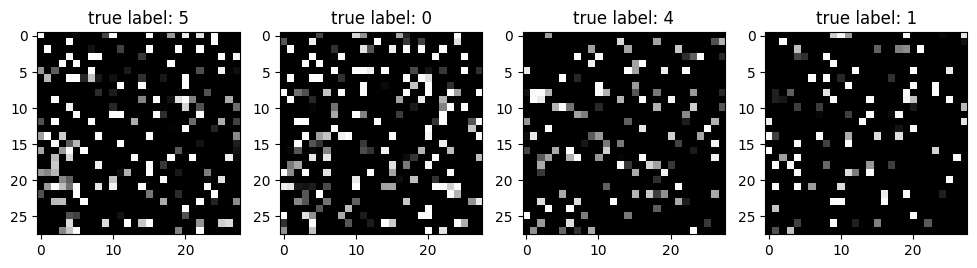

In [ ]:
# 섞인 이미지가 어떻게 생겼는지 확인해보자.
plt.figure(figsize=(12,12))
for i in range(0,4):
    plt.subplot(1,4,(i+1))
    plt.imshow((X_train_shuffle[i,:,:,0]),cmap="gray")
    plt.title('true label: '+np.str(np.argmax(Y_train,axis=1)[i]))

In [ ]:
# fcNN을 위해 1차원 벡터로 펼치기
X_train_shuffle_flat = X_train_shuffle.reshape([X_train_shuffle.shape[0], 784])
X_val_shuffle_flat = X_val_shuffle.reshape([X_val_shuffle.shape[0], 784])
X_test_shuffle_flat = X_test_shuffle.reshape([X_test_shuffle.shape[0], 784])


In [ ]:
# 아까와 마찬가지로 모델을 만들고
model = Sequential()

model.add(Dense(100, batch_input_shape=(None, 784)))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 이번엔 shuffle된 데이터로 학습을 시켜보자.
history=model.fit(X_train_shuffle_flat, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_shuffle_flat, Y_val)
                 )

Epoch 1/10
391/391 - 4s - loss: 1.0083 - accuracy: 0.7772 - val_loss: 0.3905 - val_accuracy: 0.9113 - 4s/epoch - 9ms/step
Epoch 2/10
391/391 - 2s - loss: 0.3336 - accuracy: 0.9128 - val_loss: 0.2555 - val_accuracy: 0.9304 - 2s/epoch - 4ms/step
Epoch 3/10
391/391 - 2s - loss: 0.2442 - accuracy: 0.9313 - val_loss: 0.2026 - val_accuracy: 0.9448 - 2s/epoch - 4ms/step
Epoch 4/10
391/391 - 2s - loss: 0.1962 - accuracy: 0.9437 - val_loss: 0.1716 - val_accuracy: 0.9529 - 2s/epoch - 5ms/step
Epoch 5/10
391/391 - 2s - loss: 0.1641 - accuracy: 0.9527 - val_loss: 0.1499 - val_accuracy: 0.9578 - 2s/epoch - 5ms/step
Epoch 6/10
391/391 - 2s - loss: 0.1389 - accuracy: 0.9595 - val_loss: 0.1360 - val_accuracy: 0.9604 - 2s/epoch - 4ms/step
Epoch 7/10
391/391 - 2s - loss: 0.1193 - accuracy: 0.9660 - val_loss: 0.1216 - val_accuracy: 0.9646 - 2s/epoch - 5ms/step
Epoch 8/10
391/391 - 2s - loss: 0.1045 - accuracy: 0.9702 - val_loss: 0.1142 - val_accuracy: 0.9655 - 2s/epoch - 6ms/step
Epoch 9/10
391/391 - 2s 

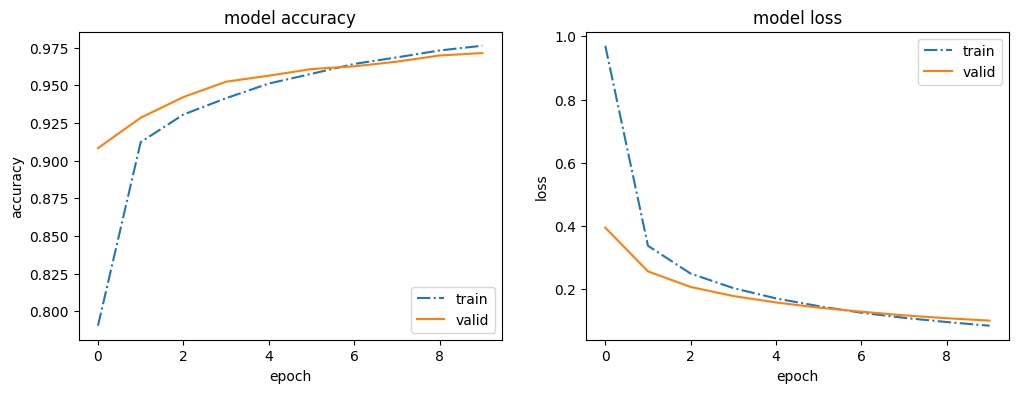

In [ ]:
# 정확도와 loss의 변화를 시각적으로 확인해보기
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [ ]:
pred=model.predict(X_test_shuffle_flat)
love_ESC = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("모델 정확도 = " , love_ESC)

313/313 [==============================] - 1s 2ms/step
모델 정확도 =  0.9694


# CNN으로 MNIST 분석하기

In [ ]:
batch_size = 128

In [ ]:
# 2개의 convolution layer와 fc layer를 가진 CNN을 만들 것
model = Sequential()

model.add(Convolution2D(8,(3, 3),padding='same',input_shape=(28, 28, 1)))
# 8개의 filter를 가진 convolution layer, 3*3 필터 사용
model.add(Activation('relu')) #이번에는 activation으로 ReLU를 써보자.
model.add(Convolution2D(8, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #2*2d의 MaxPooling을 사용

model.add(Convolution2D(16, (3, 3),padding='same'))
#이번에는 16개의 filter를 가진 convolution layer
model.add(Activation('relu'))
model.add(Convolution2D(16,(3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #마찬가지로 Maxpooling

model.add(Flatten()) #이제 fc Layer를 위해 모든 데이터를 펼치자.
model.add(Dense(40)) #40개의 neuron을 가진 fc Layer 추가
model.add(Activation('relu'))
model.add(Dense(10)) #Output에는 0~9까지 10가지의 class가 있음
model.add(Activation('softmax')) #확률의 합을 1로 맞추기 위해 softmax함수 사용

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 모델을 트레이닝 하고...
history=model.fit(X_train, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val, Y_val)
                 )

Epoch 1/10
391/391 - 42s - loss: 0.3530 - accuracy: 0.8905 - val_loss: 0.1232 - val_accuracy: 0.9609 - 42s/epoch - 109ms/step
Epoch 2/10
391/391 - 55s - loss: 0.0960 - accuracy: 0.9705 - val_loss: 0.0829 - val_accuracy: 0.9757 - 55s/epoch - 141ms/step
Epoch 3/10
391/391 - 47s - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0713 - val_accuracy: 0.9786 - 47s/epoch - 121ms/step
Epoch 4/10
391/391 - 45s - loss: 0.0528 - accuracy: 0.9840 - val_loss: 0.0551 - val_accuracy: 0.9843 - 45s/epoch - 114ms/step
Epoch 5/10
391/391 - 55s - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.0549 - val_accuracy: 0.9851 - 55s/epoch - 140ms/step
Epoch 6/10
391/391 - 42s - loss: 0.0379 - accuracy: 0.9885 - val_loss: 0.0541 - val_accuracy: 0.9851 - 42s/epoch - 108ms/step
Epoch 7/10
391/391 - 41s - loss: 0.0317 - accuracy: 0.9904 - val_loss: 0.0499 - val_accuracy: 0.9857 - 41s/epoch - 106ms/step
Epoch 8/10
391/391 - 44s - loss: 0.0297 - accuracy: 0.9907 - val_loss: 0.0548 - val_accuracy: 0.9851 - 44s/epoch - 112

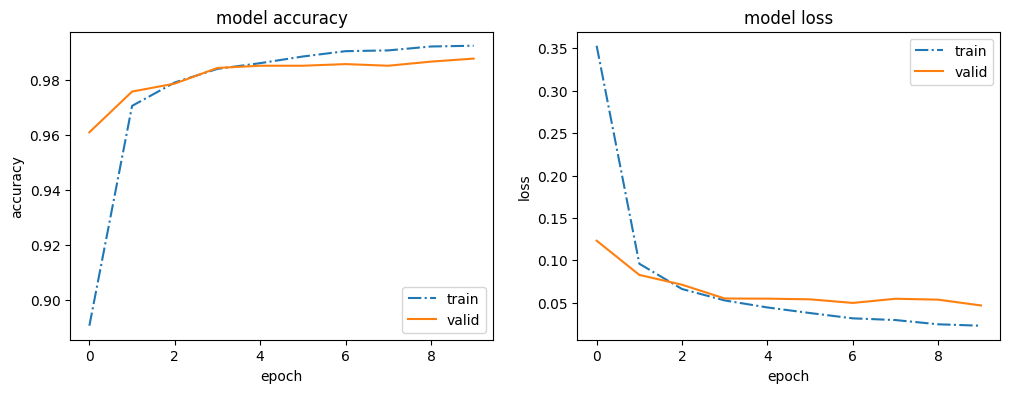

In [ ]:
# 마찬가지로, training 진행에 따른 accuracy와 loss변화를 시각적으로 확인해보자.
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [ ]:
pred=model.predict(X_test) #모델의 정확도를 확인해보자.
fighting_ESC = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("모델 정확도 = " , fighting_ESC)

313/313 [==============================] - 3s 10ms/step
모델 정확도 =  0.9894


### Train the CNN on the shuffled data

In [ ]:
# check the shape of the shuffled data
# we need matrices as input
X_train_shuffle.shape,Y_train.shape,X_val_shuffle.shape,Y_val.shape

((50000, 28, 28, 1), (50000, 10), (10000, 28, 28, 1), (10000, 10))

In [ ]:
# 2개의 convolution layer와 fc layer를 가진 CNN을 만들 것
model = Sequential()

model.add(Convolution2D(8,(3, 3),padding='same',input_shape=(28, 28, 1)))
# 8개의 filter를 가진 convolution layer, 3*3 필터 사용
model.add(Activation('relu')) #이번에는 activation으로 ReLU를 써보자.
model.add(Convolution2D(8, (3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #2*2d의 MaxPooling을 사용

model.add(Convolution2D(16, (3, 3),padding='same'))
#이번에는 16개의 filter를 가진 convolution layer
model.add(Activation('relu'))
model.add(Convolution2D(16,(3, 3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #마찬가지로 Maxpooling

model.add(Flatten()) #이제 fc Layer를 위해 모든 데이터를 펼치자.
model.add(Dense(40)) #40개의 neuron을 가진 fc Layer 추가
model.add(Activation('relu'))
model.add(Dense(10)) #Output에는 0~9까지 10가지의 class가 있음
model.add(Activation('softmax')) #확률의 합을 1로 맞추기 위해 softmax함수 사용

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 이번엔 shuffle된 이미지를 이용하여 모델을 학습시켜보자.
history=model.fit(X_train_shuffle, Y_train,
                  batch_size=128,
                  epochs=10,
                  verbose=2,
                  validation_data=(X_val_shuffle, Y_val)
                 )

Epoch 1/10
391/391 - 58s - loss: 0.7647 - accuracy: 0.7549 - val_loss: 0.3676 - val_accuracy: 0.8879 - 58s/epoch - 149ms/step
Epoch 2/10
391/391 - 45s - loss: 0.3415 - accuracy: 0.8969 - val_loss: 0.2658 - val_accuracy: 0.9173 - 45s/epoch - 115ms/step
Epoch 3/10
391/391 - 43s - loss: 0.2617 - accuracy: 0.9208 - val_loss: 0.2208 - val_accuracy: 0.9310 - 43s/epoch - 111ms/step
Epoch 4/10
391/391 - 44s - loss: 0.2175 - accuracy: 0.9335 - val_loss: 0.1951 - val_accuracy: 0.9392 - 44s/epoch - 112ms/step
Epoch 5/10
391/391 - 42s - loss: 0.1847 - accuracy: 0.9433 - val_loss: 0.1804 - val_accuracy: 0.9446 - 42s/epoch - 108ms/step
Epoch 6/10
391/391 - 46s - loss: 0.1608 - accuracy: 0.9500 - val_loss: 0.1691 - val_accuracy: 0.9452 - 46s/epoch - 116ms/step
Epoch 7/10
391/391 - 43s - loss: 0.1412 - accuracy: 0.9555 - val_loss: 0.1635 - val_accuracy: 0.9500 - 43s/epoch - 111ms/step
Epoch 8/10
391/391 - 53s - loss: 0.1288 - accuracy: 0.9592 - val_loss: 0.1663 - val_accuracy: 0.9500 - 53s/epoch - 135

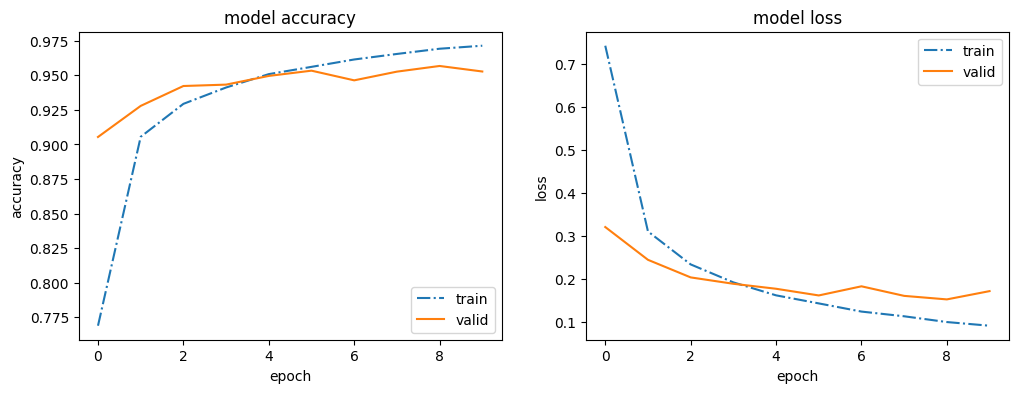

In [ ]:
# plot the development of the accuracy and loss during training
plt.figure(figsize=(12,4))
plt.subplot(1,2,(1))
plt.plot(history.history['accuracy'],linestyle='-.')
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(1,2,(2))
plt.plot(history.history['loss'],linestyle='-.')
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')

In [ ]:
pred=model.predict(X_test_shuffle) #shuffle된 그림으로 학습한 모델의 정확도를 확인해보자.
accuracy_ESC = np.sum(np.argmax(Y_test,axis=1)==np.argmax(pred,axis=1))/len(pred)
print("모델 정확도 = " , accuracy_ESC)

313/313 [==============================] - 5s 15ms/step
모델 정확도 =  0.9546
